# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007
## Homework 3: RNNs

Note 1: If you don't know how to run jupyter on the Prince cluster, here is another step-by-step guide here: 
<a href='https://docs.google.com/document/d/1HIdtzqJ6-RpsV0z2Gf5iXphNBTRca1kHZPlyqFxKpWs/edit?usp=sharing'> **Running Jupyter on the Cluster **</a>

Note 2: If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex
See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics">here</a>.


Submission instruction: Upload and Submit your final jupyter notebook file in newclasses.nyu.edu

**Submission deadline: Thursday April 16th 2020 5pm.**



# Question 1: Literature Review: DeepMod (Total points 20 + 10 bonus points)

Read this paper:

#### Qian Liu, Li Fang, Guoliang Yu, Depeng Wang, Chuan-Le Xiao & Kai Wang, _"Detection of DNA base modifications by deep recurrent neural network on Oxford Nanopore sequencing data"_ ,  Nature Communications, 2019 https://www.nature.com/articles/s41467-019-10168-2

We are interested in understanding the task, the methods that is proposed in this publication, technical aspects of the implementation, and possible future work.

**1.1) (5 points)** After you read the full article, go back to section **Methods**. Briefly describe the primary Deep Learning architecture used in DeepMod. Write the number of layers used, number of features input to the network?


The deep learing architecture used in DeepMod is bidirectional RNN with long short-term memory (LSTM) units. There are 3 hidden layers and 7 features input in the network.

**1.2) (5 points)** Describe the optional second deep neural network architecuture, including the number of layers and number of input features, number of nodes in hidden layers. 

There are four layers in the second deep neural network, including an input layer, two hidden layers, and an output layer. 

The input of the network is a 14-value vector.

The first hidden layer has 100 hidden nodes, and the second hidden layer has 20 hidden nodes. Different layers were connected by full network with dropout (dropout rate = 0.7).

The output layer has sigmoid activation for outputting final methylation percentage for a CpG site.

**1.3) (5 points)** What is the loss function used to train the primary network? 

What are the evaluation criteria used by the authors for all the tasks? (**Hint:** Look at Performance measurements)

Loss Function: cross entropy loss

Evaluation Criteria: accuracy, precision, recall, AP(weighted mean of precisions achieved at each threshold of predicted methylation percentage), and AUC(area under receiver operating characteristic curve)

**1.4) (5 points)** Are there some data augmentation/regularization that authors have used? What are some techniques that could have been used and wasn't?

The paper applies drop out in the second deep neural network. Other techniques can be L1/L2 regularization.

**1.5) (Bonus maximum 10 points)**. What other architectures would you try? For each family of models, please do a literature search and see if a paper on that architecture for the task of DNA base modification has been used.

Convolutional Neural Network, Deep Neural Network, Hidden Markov Model 

##### Convolutional Neural Network: 
DeepSignal: detecting DNA methylation state from Nanopore sequencing reads using deep-learning 

##### Perceptron Neural Network:
Nanopore detection of bacterial DNA base modifications

##### Hidden Markov Model 
Detecting DNA cytosine methylation using nanopore sequencing

# Question 2: Literature Review: Self Attention (20 points + 10 bonus points)

Read this paper: 


#### Xianlong Zeng, Yunyi Feng, Soheil Moosavinasab, Deborah Lin, Simon Lin, Chang Liu _"Multilevel Self-Attention Model and its Use on Medical Risk Prediction"_ https://psb.stanford.edu/psb-online/proceedings/psb20/Zeng.pdf

After you read the paper, go back to Section 3.2 and 3.3. 

**2.1) (10 points)** Describe the architecture used in the paper to generate patient embedding. Please mention the architecture of self-attention units including any formula given in paper. Also include the input to the architecture.  


#### model architecture
1. Model input: medical codes within each medical visit.
2. Medical codes c of each visit are projected into a mdimensional continuous embedding space, and passed through the code-level self-attention encoder and aggregated into a visit embedding v.
3. Each medical visit embedding v add its time embedding.
4. Aggregate the visit vectors via the visit-level self-attention encoder, and formed the intermediate patient representation u.
5. Concatenate the intermediate patient embedding u and demographic embedding, and  stacked three fully connected feedforward layers to obtain the patient embedding p.

#### self-attention units：
1. A self-attention unit contains a self-attention layer, normalization layer and a feed forward residual connected layer.

2. There are two self-attention units in the model, code-level and visit-level self-attention unit.

$ S_c(c_k|c_1,c_2,...,c_j) = \sigma_v(f(c_k + \sum\limits_{l=1}^{|v|}\propto_{c_k c_l} c_k)) $

$\propto_{c_k*c_1},\propto_{c_k*c_2},...,\propto_{c_k*c_|v|} = softmax(\frac{Q_{c_k} K_{c_1}}{\sqrt{m}}, \frac{Q_{c_k} K_{v_2}}{\sqrt{m}},...,\frac{Q_{c_k} K_{v_{|v|}}}{\sqrt{m}}) $

$Q_{c_k} = W_q c_k$
    
$K_{c_k} = W_k c_k$

**2.2) (5 points)** What are the different tasks that the architecture is used to solve? What are the Loss functions used for different tasks? What are the evaluation criteria for the different tasks?

Disease prediction (multiclass classification task) and medical cost prediction (regression task). 

The paper uses negative log-likelihood loss function for disease prediction and mean-squared-error for cost prediction.

Evaluation metric of cost prediction: mean absolute error

Evaluation metric of disease prediction: Recall@k (defined as the number of successfully recalled medical codes from the k recalled codes divided by the number of true positive diagnosis codes)

**2.3) (5 points)** In Section 5.2 What is the best model according to the evaluation criteria? How is it different from the second best model?

MSAM(AUX) is the best model, MSAM is the second best model.

MSAM with auxiliary task implement disease prediction, it mitigated the random nature of incurring the medical cost and stabilized the prediction.

**2.4) (Bonus maximum 10 points)** What are some alternative architectures/Loss functions/Pretraining methods that you would recommend as followup work? Name 2 potential architectures, and in a few sentences explain why the proposed changes might work better.


1. BERT language representation model: BERT models are state-of-the-art models for a wide range of tasks, and achieve high score on GLUE Test. BERT use a bidirectional pre-training architecture, giving better performance than standard unidirectional language model.
2. SmoothL1Loss can be used as loss function in cost prediction. Compared with mean squared error loss, smooth L1 loss is robust to outliers.

# Question 3 - Programming: Build Classifiers on Medical Transcriptions - Recurrent Neural Networks and Self Attention(60 points + 10 bonus points)

Let's build some models now. In this homework, we will focus on a dataset which has around 5000 medical transcriptions and the corresponding medical specialty. The data is available <a href="https://www.kaggle.com/tboyle10/medicaltranscriptions">here</a>.

Here, we will focus on predicting top few classes of medical specialty, from the transcription text. <a href="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2020/tree/master/lab5">Lab 5</a> will be very useful here.

**3.1) (5 points)** Read the csv using Pandas. Select the top 5 classes ('medical_specialty') from the data. Only keep the rows that belong to one of these classes in your data. Which classes are there, and how many rows do you have after this filteration?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('mtsamples.csv',index_col=0)
top_5_classes = df.groupby('medical_specialty').count().sort_values('sample_name',ascending=False)[:5].index.tolist()
top_5_classes

[' Surgery',
 ' Consult - History and Phy.',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Radiology']

In [2]:
df = df.loc[df['medical_specialty'].apply(lambda x : x in top_5_classes),:]
df = df.loc[df['transcription'].apply(lambda x : type(x) == str),:]
df['label'] = df['medical_specialty'].apply(lambda x : top_5_classes.index(x))
df.head()

,description,medical_specialty,sample_name,transcription,keywords,label
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",2
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram...",2
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,...",2
11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler...",2


In [3]:
print('Number of rows:',len(df))

Number of rows: 2603


**3.2) (5 points)** Now convert your data into train, test and validation set. Shuffle the rows, and split them with ratios of (train:60%, valid:20%, test:20%). Set the random seed to 2020. Please follow the steps from https://pytorch.org/docs/stable/notes/randomness.html to set all the seeds to make the results reproducible.

In [4]:
from sklearn.model_selection import train_test_split
import os
import torch
import random
def seed_torch(seed=2020):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_torch(seed=2020)

In [5]:
train_data, test_val_data = train_test_split(df, test_size=0.40, random_state=2020)
test_data, val_data = train_test_split(test_val_data, test_size=0.50, random_state=2020)
train_data.index = np.arange(len(train_data))
val_data.index = np.arange(len(val_data))
test_data.index = np.arange(len(test_data))

**3.3) (5 points)** Create a function to create vocabulary from the training data. Only use the transcription column for this. Use the tokenization scheme of your choice and create a vocabulary.

In [6]:
from collections import Counter
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def build_vocab(sentences, min_count=3, max_vocab=None):
    UNK = "<UNK>"
    PAD = "<PAD>"
    word_count = Counter()
    for sentence in sentences:
        sentence = re.sub('[\\(\[#.!?,\'\/\])0-9]', ' ', sentence)
        word_count.update(word_tokenize(sentence.lower()))
    
    vocabulary = list([w for w in word_count if word_count[w] > min_count]) + [UNK, PAD]
    indices = dict(zip(vocabulary, range(len(vocabulary))))
    return vocabulary, indices

vocabulary, vocab_indices = build_vocab(train_data['transcription'])
print(len(vocabulary))

[nltk_data] Downloading package punkt to /home/yz6432/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


8714


**3.4) (10 points)** Write a dataloader and collate function so that we can begin to train our networks! You can choose to use either the complete transcription text or fix a maximum length of transcription text as input for your model.

In [7]:
from torch.utils.data import DataLoader, Dataset

class mtDataset(Dataset):
    def __init__(self, vocab_index, df, label = 'label'):
        self.vocab_index = vocab_index
        self.df = df
        self.label = label
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, key):
        sentence = self.df.loc[key, 'transcription']
        sentence = re.sub('[\\(\[#.!?,\'\/\])0-9]', ' ', sentence)
        token_indices = np.array([self.vocab_index[word] if word in self.vocab_index else self.vocab_index['<UNK>'] for word in word_tokenize(sentence.lower())])
        return (torch.tensor(token_indices) , self.df.loc[key, self.label])


def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = [len(x) for x in xx]

    xx_pad = pad_sequence(xx, batch_first=True, padding_value=len(vocabulary)-1)

    return torch.as_tensor(xx_pad), torch.as_tensor(x_lens), torch.LongTensor(yy)
    

BATCH_SIZE = 2
train_loader = DataLoader(mtDataset(vocab_indices, train_data),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)
val_loader = DataLoader(mtDataset(vocab_indices, val_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)
test_loader = DataLoader(mtDataset(vocab_indices, test_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)

**3.5) (10 points)** Now you are ready to build your sequence classification model!

First, Build a simple GRU model that takes as input the text indices from the vocabulary, and ends with a softmax over total number of classes. Use the embedding and hidden dimension of your choice. 

**Please train your model to reach at the least 55% accuracy on the test set.**

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [8]:
import time
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence
device = torch.device("cuda")

class RNN(nn.Module):
    def __init__(self, hidden_dim=40, output_dim=5, vocab_size=len(vocabulary), embedding_dim=50, rnn='GRU'):
        super(RNN, self).__init__()
        
        self.emb = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab_size-1)
        self.hidden_dim = hidden_dim
        self.rnn_fn = rnn
        assert self.rnn_fn in ['LSTM','GRU']
        self.rnn = getattr(nn, rnn)(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x, x_len):
        x = self.emb(x)
        _, last_hidden = self.rnn(pack_padded_sequence(x, x_len, batch_first=True, enforce_sorted=False))
        if self.rnn_fn == 'LSTM':
            last_hidden = last_hidden[0]
        out = self.fc(last_hidden.view(-1, self.hidden_dim))
        return out

In [9]:
def train(model, train_loader=train_loader, val_loader=val_loader, learning_rate=1e-4, num_epoch=10):
    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-8)
    train_loss_return = []
    train_acc_return = []
    val_loss_return = []
    val_acc_return = []
    best_acc = 0
    
    for epoch in range(num_epoch):
        # Training steps
        correct = 0
        total = 0
        predictions = []
        truths = []
        model.train()
        train_loss_list = []
        for i, (data, data_len, labels) in enumerate(train_loader):
            data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
            outputs = model(data, data_len)
            pred = outputs.data.max(-1)[1]
            predictions += list(pred.cpu().numpy())
            truths += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
            model.zero_grad()
            loss = loss_fn(outputs, labels)
            train_loss_list.append(loss.item())
            loss.backward()
            optimizer.step()
        # report performance
        acc = (100 * correct / total)
        train_acc_return.append(acc)
        train_loss_every_epoch = np.average(train_loss_list)
        train_loss_return.append(train_loss_every_epoch)
        print('----------Epoch{:2d}/{:2d}----------'.format(epoch+1,num_epoch))
        print('Train set | Loss: {:6.4f} | Accuracy: {:4.2f}% '.format(train_loss_every_epoch, acc))
        
        # Evaluate after every epochh
        correct = 0
        total = 0
        model.eval()
        predictions = []
        truths = []
        val_loss_list = []
        with torch.no_grad():
            for i, (data, data_len, labels) in enumerate(val_loader):
                data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
                outputs = model(data, data_len)
                loss = loss_fn(outputs, labels)
                val_loss_list.append(loss.item())
                pred = outputs.data.max(-1)[1]
                predictions += list(pred.cpu().numpy())
                truths += list(labels.cpu().numpy())
                total += labels.size(0)
                correct += (pred == labels).sum()
            # report performance
            acc = (100 * correct / total)
            val_acc_return.append(acc)
            val_loss_every_epoch = np.average(val_loss_list)
            val_loss_return.append(val_loss_every_epoch)
            if acc > best_acc:
                best_acc = acc
                best_model_wts = model.state_dict()
            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            print('Test set | Loss: {:6.4f} | Accuracy: {:4.2f}% | time elapse: {:>9}'\
                  .format(val_loss_every_epoch, acc,elapse))
    return model,train_loss_return,train_acc_return,val_loss_return,val_acc_return,best_model_wts


In [10]:
gru_model = RNN().to(device)
model,train_loss,train_acc,val_loss,val_acc,best_model_wts = train(gru_model)

----------Epoch 1/10----------
Train set | Loss: 1.5921 | Accuracy: 24.00% 
Test set | Loss: 1.4907 | Accuracy: 40.00% | time elapse:  00:00:32
----------Epoch 2/10----------
Train set | Loss: 1.4300 | Accuracy: 42.00% 
Test set | Loss: 1.3910 | Accuracy: 43.00% | time elapse:  00:01:04
----------Epoch 3/10----------
Train set | Loss: 1.3718 | Accuracy: 43.00% 
Test set | Loss: 1.3626 | Accuracy: 44.00% | time elapse:  00:01:36
----------Epoch 4/10----------
Train set | Loss: 1.3427 | Accuracy: 44.00% 
Test set | Loss: 1.3446 | Accuracy: 45.00% | time elapse:  00:02:09
----------Epoch 5/10----------
Train set | Loss: 1.3136 | Accuracy: 46.00% 
Test set | Loss: 1.3244 | Accuracy: 47.00% | time elapse:  00:02:41
----------Epoch 6/10----------
Train set | Loss: 1.2792 | Accuracy: 47.00% 
Test set | Loss: 1.2885 | Accuracy: 48.00% | time elapse:  00:03:13
----------Epoch 7/10----------
Train set | Loss: 1.2278 | Accuracy: 51.00% 
Test set | Loss: 1.2228 | Accuracy: 51.00% | time elapse:  0

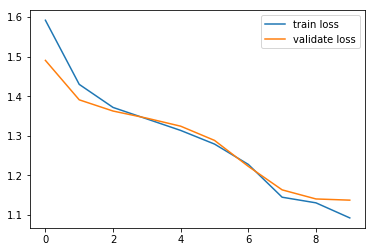

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
line1, = ax.plot(train_loss,label='train loss')
line2, = ax.plot(val_loss,label='validate loss')
ax.legend()
plt.show()

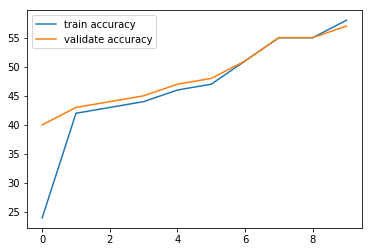

In [12]:
fig, ax = plt.subplots()
line1, = ax.plot(train_acc,label='train accuracy')
line2, = ax.plot(val_acc,label='validate accuracy')
ax.legend()
plt.show()

In [13]:
def test(model, test_loader=test_loader, best_model_wts = best_model_wts):
    model.load_state_dict(best_model_wts)
    loss_fn = nn.CrossEntropyLoss()
    correct = 0
    total = 0
    model.eval()
    predictions = []
    truths = []
    test_loss_list = []  
    with torch.no_grad():
        for i, (data, data_len, labels) in enumerate(val_loader):
            data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
            outputs = model(data, data_len)
            loss = loss_fn(outputs, labels)
            test_loss_list.append(loss.item())
            pred = outputs.data.max(-1)[1]
            predictions += list(pred.cpu().numpy())
            truths += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
        acc = (100 * correct / total)
        avg_test_loss = np.average(test_loss_list)
        print('Test set | Loss: {:6.4f} | Accuracy: {:4.2f}% '.format(avg_test_loss, acc))
    return None

In [14]:
test(gru_model)

Test set | Loss: 1.1411 | Accuracy: 57.00% 


**3.6) (25 points)** Now, let's finetune a sequence classification model based on BERT. Please install the Huggingface's Transformers library for this. Use the Pretrained 'bert-base-uncased' model for this problem. Please use the BERT tokenizer from the pretrained built for 'bert-base-uncased' model . Use the AdamW optimizer from the transformers library for optimization. Remember BERT uses Attention masks for input so you need to create a separate dataloader for BERT. Please keep in mind that BERT can handle maximum of 512 tokens.

**Please finetune the model so that it reaches at least 65% accuracy on the test set.**

The rest of your experimental setting should be the same as 3.5:

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [20]:
from torch.utils.data import Dataset
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM, BertForSequenceClassification
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
import transformers
device = torch.device("cuda")
seed_torch(seed=2020)

PRETRAINED_MODEL_NAME = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [21]:
class BERT_Dataset(Dataset):
    def __init__(self, df, tokenizer = tokenizer, label = 'label'):
        self.df = df
        self.len = len(self.df)
        self.tokenizer = tokenizer
        self.label = label
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.loc[idx, 'transcription']
        tokens_query = self.tokenizer.tokenize(text)
        tokens_query = tokens_query[:510]
        word_pieces = ["[CLS]"] + tokens_query + ["[SEP]"]
        ids = tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        item_label = self.df.loc[idx, self.label]
        return (tokens_tensor,item_label)
    
def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = [len(x) for x in xx]
    tokens_tensors = pad_sequence(xx, batch_first=True)
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    return torch.as_tensor(tokens_tensors), torch.as_tensor(x_lens), masks_tensors, torch.LongTensor(yy)

In [22]:
BATCH_SIZE = 2
train_loader = DataLoader(BERT_Dataset(train_data),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)
val_loader = DataLoader(BERT_Dataset(val_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)
test_loader = DataLoader(BERT_Dataset(test_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)

In [23]:
seed_torch(seed=2020)
def train(model, train_loader=train_loader, val_loader=val_loader, learning_rate=2e-5, num_epoch=10):
    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-8)
    optimizer = transformers.AdamW(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.0, correct_bias=True)
    train_loss_return = []
    train_acc_return = []
    val_loss_return = []
    val_acc_return = []
    best_acc = 0
    
    for epoch in range(num_epoch):
        # Training steps
        correct = 0
        total = 0
        predictions = []
        truths = []
        model.train()
        train_loss_list = []
        for i, (data, data_len, masks, labels) in enumerate(train_loader):
            data,data_len,masks,labels=data.to(device),data_len.to(device),masks.to(device),labels.to(device)
            outputs = model(data, attention_mask = masks)[0]
            pred = outputs.data.max(-1)[1]
            predictions += list(pred.cpu().numpy())
            truths += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
            model.zero_grad()
            #loss = loss_fn(outputs.squeeze(), labels)
            loss = model(data, attention_mask = masks, labels=labels)[0]
            train_loss_list.append(loss.item())
            loss.backward()
            optimizer.step()
        # report performance
        acc = (100 * correct / total)
        train_acc_return.append(acc)
        train_loss_every_epoch = np.average(train_loss_list)
        train_loss_return.append(train_loss_every_epoch)
        print('----------Epoch{:2d}/{:2d}----------'.format(epoch+1,num_epoch))
        print('Train set | Loss: {:6.4f} | Accuracy: {:4.2f}% '.format(train_loss_every_epoch, acc))
        
        # Evaluate after every epochh
        correct = 0
        total = 0
        model.eval()
        predictions = []
        truths = []
        val_loss_list = []
        with torch.no_grad():
            for i, (data, data_len, masks, labels) in enumerate(val_loader):
                data,data_len,masks,labels=data.to(device),data_len.to(device),masks.to(device),labels.to(device)
                outputs = model(data)[0]
                #loss = loss_fn(outputs.squeeze(), labels)
                loss = model(data, attention_mask = masks, labels=labels)[0]
                val_loss_list.append(loss.item())
                pred = outputs.data.max(-1)[1]
                predictions += list(pred.cpu().numpy())
                truths += list(labels.cpu().numpy())
                total += labels.size(0)
                correct += (pred == labels).sum()
            # report performance
            acc = (100 * correct / total)
            val_acc_return.append(acc)
            val_loss_every_epoch = np.average(val_loss_list)
            val_loss_return.append(val_loss_every_epoch)
            if acc > best_acc:
                best_acc = acc
                best_model_wts = model.state_dict()
            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            print('Test set | Loss: {:6.4f} | Accuracy: {:4.2f}% | time elapse: {:>9}'.format(val_loss_every_epoch, acc,elapse))
    return model,train_loss_return,train_acc_return,val_loss_return,val_acc_return,best_model_wts

In [24]:
model_BERT = transformers.modeling_bert.BertForSequenceClassification.\
from_pretrained("bert-base-uncased",num_labels=5).to(device)

In [25]:
model,train_loss,train_acc,val_loss,val_acc,best_model_wts = train(model_BERT,num_epoch=5)

----------Epoch 1/ 5----------
Train set | Loss: 1.0043 | Accuracy: 60.00% 
Test set | Loss: 0.7283 | Accuracy: 67.00% | time elapse:  00:03:01
----------Epoch 2/ 5----------
Train set | Loss: 0.6597 | Accuracy: 70.00% 
Test set | Loss: 0.5987 | Accuracy: 67.00% | time elapse:  00:05:58
----------Epoch 3/ 5----------
Train set | Loss: 0.5641 | Accuracy: 70.00% 
Test set | Loss: 0.6279 | Accuracy: 67.00% | time elapse:  00:08:54
----------Epoch 4/ 5----------
Train set | Loss: 0.5028 | Accuracy: 74.00% 
Test set | Loss: 0.6844 | Accuracy: 63.00% | time elapse:  00:11:51
----------Epoch 5/ 5----------
Train set | Loss: 0.4668 | Accuracy: 75.00% 
Test set | Loss: 0.6984 | Accuracy: 68.00% | time elapse:  00:14:48


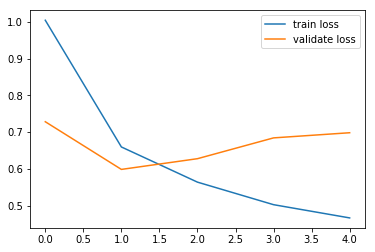

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
line1, = ax.plot(train_loss,label='train loss')
line2, = ax.plot(val_loss,label='validate loss')
ax.legend()
plt.show()

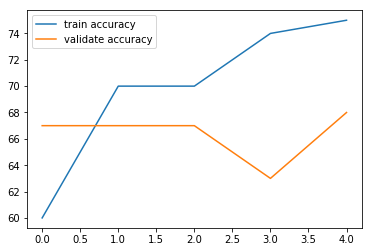

In [27]:
fig, ax = plt.subplots()
line1, = ax.plot(train_acc,label='train accuracy')
line2, = ax.plot(val_acc,label='validate accuracy')
ax.legend()
plt.show()

In [28]:
def test(model, test_loader=test_loader, best_model_wts = best_model_wts):
    model.load_state_dict(best_model_wts)
    correct = 0
    total = 0
    model.eval()
    predictions = []
    truths = []
    test_loss_list = []  
    with torch.no_grad():
        for i, (data, data_len, masks, labels) in enumerate(test_loader):
            data,data_len,masks,labels=data.to(device),data_len.to(device),masks.to(device),labels.to(device)
            outputs = model(data)[0]
            loss = model(data, attention_mask = masks, labels=labels)[0]
            test_loss_list.append(loss.item())
            pred = outputs.data.max(-1)[1]
            predictions += list(pred.cpu().numpy())
            truths += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()
        acc = (100 * correct / total)
        avg_test_loss = np.average(test_loss_list)
        print('Test set | Loss: {:6.4f} | Accuracy: {:4.2f}% '.format(avg_test_loss, acc))
    return None

In [29]:
test(model_BERT)

Test set | Loss: 0.7234 | Accuracy: 65.00% 


**3.7) (Bonus maximum 10 points)** List 5 examples on the test set that BERT misclassified. Describe reasons identified for misclassification.

1. Some misclassificated transcription exceed 512 words, only part of informations are taken from BERT model. 

2. Some misclassificated transcription correspond to multiple medical specialty. Sample 317 can be assigned as 'Consult - History and Phy.' or 'Orthopedic', while ture label is 'Consult - History and Phy.' and prediction is 'Orthopedic'. 

3. Some misclassificated transcription contains key words from other medical specialty, it may lead to misclassification.

Examples are list below.

In [33]:
class BERT_test_Dataset(Dataset):
    def __init__(self, df, tokenizer = tokenizer, label = 'label'):
        self.df = df
        self.len = len(self.df)
        self.tokenizer = tokenizer
        self.label = label
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.loc[idx, 'transcription']
        tokens_query = self.tokenizer.tokenize(text)
        tokens_query = tokens_query[:510]
        word_pieces = ["[CLS]"] + tokens_query + ["[SEP]"]
        ids = tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        item_label = self.df.loc[idx, self.label]
        id_ = idx
        return (tokens_tensor,item_label,id_)
    
def pad_collate(batch):
    (xx, yy, zz) = zip(*batch)
    x_lens = [len(x) for x in xx]
    tokens_tensors = pad_sequence(xx, batch_first=True)
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    return torch.as_tensor(tokens_tensors), torch.as_tensor(x_lens), masks_tensors, torch.LongTensor(yy), zz

BATCH_SIZE = 1
test_loader = DataLoader(BERT_test_Dataset(test_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)

In [34]:
def misclassification(model, test_loader=test_loader, best_model_wts = best_model_wts):
    misclassification_idx = {}
    model.load_state_dict(best_model_wts)
    model.eval() 
    with torch.no_grad():
        for i, (data, data_len, masks, labels, idx) in enumerate(test_loader):
            data,data_len,masks,labels=data.to(device),data_len.to(device),masks.to(device),labels.to(device)
            outputs = model(data)[0]
            pred = outputs.data.max(-1)[1]
            if pred!=labels:
                misclassification_idx[idx[0]]=(labels.cpu().numpy()[0],pred.cpu().numpy()[0])
    return misclassification_idx

In [35]:
misclassification_idx = misclassification(model_BERT)

In [36]:
print('Length of transcription in ten random misclassification samples:',end=' ')
for i in list(misclassification_idx.keys())[:10]:
    print(len(df.iloc[i]['transcription'].split()),end=', ')

Length of transcription in ten random misclassification samples: 627, 489, 276, 543, 593, 146, 885, 670, 718, 234, 

In [37]:
for i in list(misclassification_idx.keys())[:5]:
    print('-------------------------------------------------------------')
    print('Sample index:',i)
    print('Label:',top_5_classes[misclassification_idx[i][0]])
    print('Prediction:',top_5_classes[misclassification_idx[i][1]])
    print(df.iloc[i]['transcription'])

-------------------------------------------------------------
Sample index: 317
Label:  Consult - History and Phy.
Prediction:  Orthopedic
PREOPERATIVE DIAGNOSIS: , Left tibial tubercle avulsion fracture.,POSTOPERATIVE DIAGNOSIS:,  Comminuted left tibial tubercle avulsion fracture with intraarticular extension.,PROCEDURE:,  Open reduction and internal fixation of left tibia.,ANESTHESIA: , General.  The patient received 10 ml of 0.5% Marcaine local anesthetic.,TOURNIQUET TIME: , 80 minutes.,ESTIMATED BLOOD LOSS:,  Minimal.,DRAINS: , One JP drain was placed.,COMPLICATIONS: , No intraoperative complications or specimens.  Hardware consisted of two 4-5 K-wires, One 6.5, 60 mm partially threaded cancellous screw and one 45, 60 mm partially threaded cortical screw and 2 washers.,HISTORY AND PHYSICAL:,  The patient is a 14-year-old male who reported having knee pain for 1 month.  Apparently while he was playing basketball on 12/22/2007 when he had gone up for a jump, he felt a pop in his knee